[View in Colaboratory](https://colab.research.google.com/github/targoons/ML/blob/master/MLAssignment2.ipynb)

# MsCA 31009 - Machine Learning and Predictive Analytics

## Assignment 2 - Regression with Gradient Descent

**Targoon Siripanichpong**

## Import files and libraries

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import math
import tensorflow as tf
import time

# Keras

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

#Sklearn

from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale

**Mount Google Drive.**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Read bottle.csv file.**

In [5]:
mypath = '/content/gdrive/My Drive/UChicago/Machine Learning/Data/Raw'
import os
os.listdir(mypath)

['bottle.csv']

In [25]:
bottle_data = pd.read_csv('/content/gdrive/My Drive/UChicago/Machine Learning/Data/Raw/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration and Pre-Processing

In [26]:
type(bottle_data)

pandas.core.frame.DataFrame

In [27]:
bottle_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


**Extract only 'T_degC', 'Salnty', and 'STheta' **

In [28]:
bottle_data_subset = bottle_data.loc[:,['T_degC','Salnty','STheta']]
bottle_data_subset.describe()

,T_degC,Salnty,STheta
count,853900.000000,817509.000000,812174.000000
mean,10.799677,33.840350,25.819394
std,4.243825,0.461843,1.167787
min,1.440000,28.431000,20.934000
25%,7.680000,33.488000,24.965000
50%,10.060000,33.863000,25.996000
75%,13.880000,34.196900,26.646000
max,31.140000,37.034000,250.784000


In [29]:
bottle_data_subset.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


**Remove NaN.**

In [30]:
bottle_data_subset = bottle_data_subset.dropna()
bottle_data_subset.describe()

,T_degC,Salnty,STheta
count,812174.000000,812174.000000,812174.000000
mean,10.847904,33.842424,25.819394
std,4.221005,0.461567,1.167787
min,1.440000,28.431000,20.934000
25%,7.750000,33.490000,24.965000
50%,10.100000,33.869200,25.996000
75%,13.910000,34.198000,26.646000
max,31.140000,37.034000,250.784000


**Create scatter plots.**

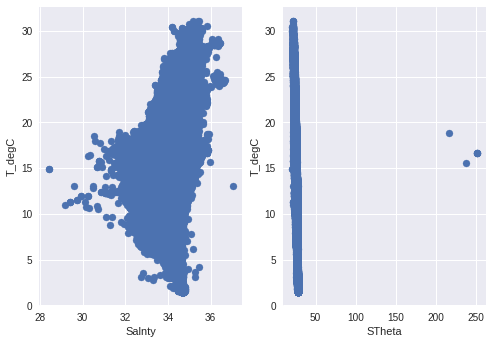

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(bottle_data_subset['Salnty'], bottle_data_subset['T_degC'])
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.subplot(1, 2, 2)
plt.scatter(bottle_data_subset['STheta'], bottle_data_subset['T_degC'])
plt.xlabel('STheta')
plt.ylabel('T_degC')
plt.show()

From the scatter plots, it can be seen that there are a few outliers in STheta. Creating boxplots to confirm below.

**Creating Boxplots.**

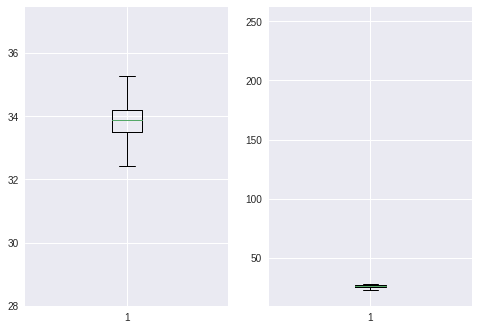

In [13]:
plt.subplot(1,2,1)
plt.boxplot(bottle_data_subset['Salnty'])
plt.subplot(1,2,2)
plt.boxplot(bottle_data_subset['STheta'])
plt.show()

There seems to be some outlier in **STheta** in the upper tail. Remove data that is more or less than 3 SD.

In [31]:
bottle_data_subset = bottle_data_subset[bottle_data_subset['STheta'] < np.mean(bottle_data_subset['STheta']) + 3 * np.std(bottle_data_subset['STheta'])]
bottle_data_subset.describe()

,T_degC,Salnty,STheta
count,812168.000000,812168.000000,812168.000000
mean,10.847859,33.842430,25.817791
std,4.220989,0.461564,1.007309
min,1.440000,28.431000,20.934000
25%,7.750000,33.490000,24.965000
50%,10.100000,33.869450,25.996000
75%,13.910000,34.198000,26.646000
max,31.140000,37.034000,28.139000


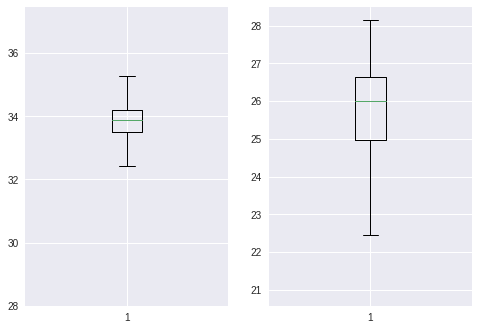

In [15]:
plt.subplot(1,2,1)
plt.boxplot(bottle_data_subset['Salnty'])
plt.subplot(1,2,2)
plt.boxplot(bottle_data_subset['STheta'])
plt.show()

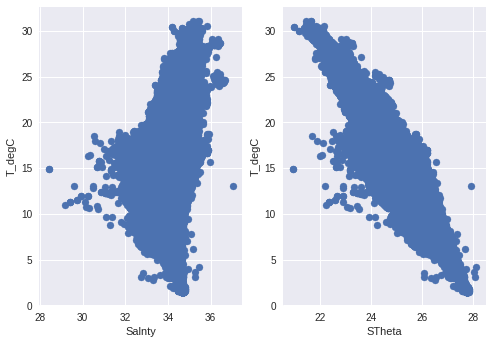

In [57]:
plt.subplot(1, 2, 1)
plt.scatter(bottle_data_subset['Salnty'], bottle_data_subset['T_degC'])
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.subplot(1, 2, 2)
plt.scatter(bottle_data_subset['STheta'], bottle_data_subset['T_degC'])
plt.xlabel('STheta')
plt.ylabel('T_degC')
plt.show()

The STheta vs T_degC scatter plot looks much better. Six data points were omitted from the dataset as they are outliers.

**Split Train and Test data.**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(bottle_data_subset.iloc[:,1:], bottle_data_subset.iloc[:,0], test_size = .3, random_state = 43)

In [33]:
x_train.head()

,Salnty,STheta
382414,33.973,26.417
435800,33.863,26.529
279807,33.870,26.002
228238,34.700,26.038
376449,34.176,26.537


In [34]:
x_train.describe()

,Salnty,STheta
count,568517.000000,568517.000000
mean,33.842449,25.817422
std,0.461425,1.007396
min,28.431000,20.934000
25%,33.490000,24.964000
50%,33.869600,25.997000
75%,34.198000,26.646000
max,37.034000,28.139000


**Scale Train and Test Data.**

In [0]:
scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_train_scaled = scaler_x.transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

In [18]:
print(x_train_scaled)

[[ 0.28293147  0.5951765 ]
 [ 0.04453908  0.70635434]
 [ 0.0597095   0.18322288]
 ...
 [-1.09541002 -0.34983518]
 [-1.17559655 -0.51858727]
 [ 1.16498334 -1.39312013]]


## Model Generation

### OLS Linear Regression

Use different methods to fit the model.

#### Mini-Batch Gradient Descent

**Convert train and test features to numpy array.**

In [0]:
X_b_train = np.c_[np.ones((len(x_train_scaled), 1)), x_train_scaled]
X_b_test = np.c_[np.ones((len(x_test_scaled), 1)), x_test_scaled]
y_train = y_train.ravel().reshape(len(y_train), 1)
y_test = y_test.ravel().reshape(len(y_test), 1)

**Run Mini-Batch Gradient Descent with different mini-batch size.**

In [30]:
eta = 0.1
n_epochs = 100
minibatch_size = [50,2000,10000, len(y_train)] # Mini-batch size 50, 2000, 10000, and the last mini-batch corresponds to the full data set (a batch).
theta = []

for j, mbs in enumerate(minibatch_size): # perform mini-batch gradient descent with different mini-batch size
    np.random.seed(42)
    theta.append(np.random.randn(3,1))  # random initialization
    start = time.time()
    for epoch in range(n_epochs): # go through # epochs
        shuffled_indices = np.random.permutation(len(y_train)) # shuffle indices
        X_b_train_shuffled = X_b_train[shuffled_indices]
        y_train_shuffled = y_train[shuffled_indices]
        for i in range(0, len(y_train), mbs): # loop through mini-batches
            xi = X_b_train_shuffled[i:i+mbs]
            yi = y_train_shuffled[i:i+mbs]
            gradients = 2 / mbs * xi.T.dot(xi.dot(theta[j]) - yi)
            theta[j] = theta[j] - eta * gradients
    end = time.time()
    print(mbs, ' : ',end - start)

50  :  14.647116661071777
2000  :  7.554504156112671
10000  :  11.040414333343506
568517  :  10.953172445297241


In [21]:
print(theta)

[array([[10.85263672],
       [ 1.48535419],
       [-5.13675932]]), array([[10.85353354],
       [ 1.44432538],
       [-5.06873245]]), array([[10.85144882],
       [ 1.43867548],
       [-5.07415867]]), array([[10.84957069],
       [ 1.42601726],
       [-5.06619209]])]


**Calculate predicted output.**

In [0]:
y_predict_train = [np.dot(X_b_train,i) for i in theta]
y_predict_test = [np.dot(X_b_test,i) for i in theta]

**Calculate RMSE, VAF, and R-squared values for train data.**

In [23]:
for i, y_predict in enumerate(y_predict_train):
    print('\nFor mini-batch size ', minibatch_size[i], ':')
    print('MSE_train = ', round(mean_squared_error(y_train,y_predict),4))
    print('VAF_train = ', round(explained_variance_score(y_train,y_predict),4))
    print('R-squared_train = ', round(r2_score(y_train,y_predict),4))


For mini-batch size  50 :
MSE_train =  0.2352
VAF_train =  0.9868
R-squared_train =  0.9868

For mini-batch size  2000 :
MSE_train =  0.2333
VAF_train =  0.9869
R-squared_train =  0.9869

For mini-batch size  10000 :
MSE_train =  0.2331
VAF_train =  0.9869
R-squared_train =  0.9869

For mini-batch size  568517 :
MSE_train =  0.2331
VAF_train =  0.9869
R-squared_train =  0.9869


**Calculate RMSE, VAF, and R-squared values for test data.**

In [24]:
for i, y_predict in enumerate(y_predict_test):
    print('\nFor mini-batch size ', minibatch_size[i], ':')
    print('MSE_test = ', round(mean_squared_error(y_test,y_predict),4))
    print('VAF_test = ', round(explained_variance_score(y_test,y_predict),4))
    print('R-squared_test = ', round(r2_score(y_test,y_predict),4))


For mini-batch size  50 :
MSE_test =  0.2351
VAF_test =  0.9868
R-squared_test =  0.9868

For mini-batch size  2000 :
MSE_test =  0.2335
VAF_test =  0.9869
R-squared_test =  0.9869

For mini-batch size  10000 :
MSE_test =  0.2333
VAF_test =  0.9869
R-squared_test =  0.9869

For mini-batch size  568517 :
MSE_test =  0.2333
VAF_test =  0.9869
R-squared_test =  0.9869


R-squared in both train and test data are very high (~0.987). The model fits very well.

#### Linear Regression in SKlearn.

**Fit the model and find the coefficients.**

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
lin_reg.intercept_, lin_reg.coef_

(10.849570693576448, array([ 1.43368139, -5.07385622]))

The coefficients are consistent with the result from Gradient Descent.

**Calculate MSE, VAF, and R-squared for both train and test data.**

In [37]:
y_predict_train_skl = lin_reg.predict(x_train_scaled)
y_predict_test_skl = lin_reg.predict(x_test)

print('MSE_train = ' + str(mean_squared_error(y_train,y_predict_train_skl)))
print('VAF_train = ' + str(explained_variance_score(y_train,y_predict_train_skl)))
print('R-squared_train = ' + str(r2_score(y_train,y_predict_train_skl)))

print('MSE_test = ' + str(mean_squared_error(y_test,y_predict_test_skl)))
print('VAF_test = ' + str(explained_variance_score(y_test,y_predict_test_skl)))
print('R-squared_test = ' + str(r2_score(y_test,y_predict_test_skl)))

MSE_train = 0.23310575113866477
VAF_train = 0.98692852743124
R-squared_train = 0.98692852743124
MSE_test = 6803.034205384867
VAF_test = 0.9509139948916274
R-squared_test = -381.65876754595655


R-squared for both train and test data calculated from sklearn are the very similar to the Mini-batch gradient descent. 

#### Linear Regression in Keras with Mini-Batch Gradient Descent.

In [0]:
inputs = Input(shape=(2,))
preds = Dense(1,activation='linear')(inputs)

In [50]:
model = Model(inputs=inputs,outputs=preds)
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(x_train_scaled,y_train, batch_size=2000, epochs=10, shuffle=True)

Epoch 1/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 2/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 3/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 4/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 5/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 6/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 7/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 8/10
568517/568517 [==============================] - 1s 2us/step - loss: 0.2332 - mean_squared_error: 0.2332
Epoch 9/10
568517/568517 [==============================] - 1s 2us/step 

In [56]:
model.get_weights()

[array([[ 1.4438694],
        [-5.069784 ]], dtype=float32), array([10.84973], dtype=float32)]

In [0]:
y_predict_train_keras = model.predict(x_train_scaled)
y_predict_test_keras = model.predict(x_test_scaled)

In [49]:
print('MSE_train = ' + str(mean_squared_error(y_train,y_predict_train_keras)))
print('VAF_train = ' + str(explained_variance_score(y_train,y_predict_train_keras)))
print('R-squared_train = ' + str(r2_score(y_train,y_predict_train_keras)))

print('MSE_test = ' + str(mean_squared_error(y_test,y_predict_test_keras)))
print('VAF_test = ' + str(explained_variance_score(y_test,y_predict_test_keras)))
print('R-squared_test = ' + str(r2_score(y_test,y_predict_test_keras)))

MSE_train = 0.23333858543128888
VAF_train = 0.986917192415427
R-squared_train = 0.9869154711807862
MSE_test = 0.2335509790786688
VAF_test = 0.9868653310934342
R-squared_test = 0.9868631661821347


#### Summary

## Export file

In [49]:
!jupyter nbconvert --to html '/content/gdrive/My Drive/Colab Notebooks/MLAssignment2.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/My Drive/Colab Notebooks/MLAssignment2.ipynb to html
[NbConvertApp] Writing 413651 bytes to /content/gdrive/My Drive/Colab Notebooks/MLAssignment2.html
